# Autoregressive integrated moving average

The dataset can be found [here](https://guschmueds.blob.core.windows.net/datasets/solar.csv). [Here](https://cntk.ai/pythondocs/CNTK_106B_LSTM_Timeseries_with_IOT_Data.html#Data-generation) is a description of the dataset from the CNTK library tutorial.

The `.csv` file has 3 columns `time`, `solar.current` and `solar.total`. Here is the head of the file:
```
time,solar.current,solar.total
2013-12-01 07:00:00,6.300000190734863,1.690000057220459
2013-12-01 07:30:00,44.29999923706055,11.359999895095825
2013-12-01 08:00:00,208.0,67.5
2013-12-01 08:30:00,482.0,250.5
2013-12-01 09:00:00,774.0,573.5
```

`solar.current` is the current production. `solar.total` is the total energy produced for the day so far in W.h (I guess).



In [12]:
%matplotlib inline
import pandas as pd

We load the file, create a `DatetimeIndex`.

In [33]:
solar = pd.read_csv('../../data/solar.csv', parse_dates=['time'], index_col='time')
solar["date"] = solar.index.date
solar.rename(columns={'solar.current': 'current', 'solar.total': 'total'}, inplace=True)
solar.head(2)

,current,total,date
time,,,
2013-12-01 07:00:00,6.300000,1.69,2013-12-01
2013-12-01 07:30:00,44.299999,11.36,2013-12-01


In [34]:
print(type(solar.index))

<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


In [35]:
print(solar.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 25369 entries, 2013-12-01 07:00:00 to 2016-12-01 19:00:00
Data columns (total 3 columns):
current    25369 non-null float64
total      25369 non-null float64
date       25369 non-null object
dtypes: float64(2), object(1)
memory usage: 792.8+ KB
None


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fa4e96a0978>,
      dtype=object)

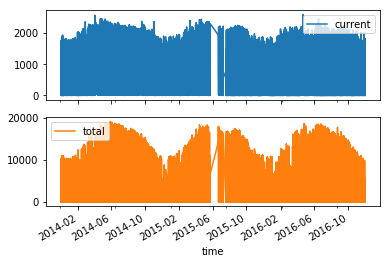

In [36]:
solar.plot(subplots=True)

Well it seems that there was some of sensor failure in the summer of 2015.

Let's look at a close-up view:

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fa4e938f048>,
      dtype=object)

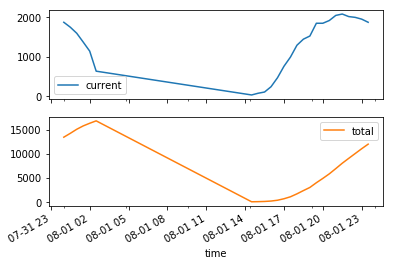

In [40]:
solar['2014-08-01'].plot(subplots=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fa4e91b6ef0>,
      dtype=object)

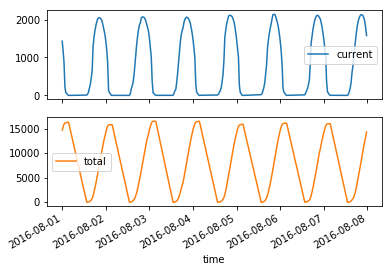

In [41]:
solar['2016-08-01':'2016-08-07'].plot(subplots=True)